## 8.1

In [1]:
#필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
#데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) #2차원 구조를 28*28*1의 3차원 구조로 변환한다
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
#모델 선택(신경망 구조 설계)
cnn = Sequential()
cnn.add(Conv2D(6,(5,5), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
cnn.add(MaxPooling2D(pool_size = (2,2), strides =2))
cnn.add(Conv2D(16, (5,5), padding = 'valid', activation = 'relu')) #5*5 필터를 16개 사용하라는 지시, padding='valid'는 덧대기를 적용 X
cnn.add(MaxPooling2D(pool_size = (2,2), strides = 2))
cnn.add(Conv2D(120, (5,5), padding = 'valid', activation = 'relu'))
cnn.add(Flatten()) #1차원 구조로 변환해 완전연결층에 입력
cnn.add(Dense(units = 84, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'softmax'))

In [4]:
cnn.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
cnn.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_data = (x_test, y_test), verbose = 2)

res = cnn.evaluate(x_test, y_test, verbose = 0)
print('정확률 = ', res[1]*100) #res[1]에 들어있는 정확률에 100을 곱해 퍼센트로 환산하여 출력한다.

Epoch 1/30


469/469 - 6s - loss: 0.3390 - accuracy: 0.8976 - val_loss: 0.1006 - val_accuracy: 0.9703 - 6s/epoch - 12ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0912 - accuracy: 0.9715 - val_loss: 0.0704 - val_accuracy: 0.9762 - 4s/epoch - 8ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.0512 - val_accuracy: 0.9830 - 4s/epoch - 8ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0453 - val_accuracy: 0.9844 - 4s/epoch - 8ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0446 - val_accuracy: 0.9849 - 4s/epoch - 8ms/step
Epoch 6/30
469/469 - 4s - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0323 - val_accuracy: 0.9885 - 4s/epoch - 8ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0410 - val_accuracy: 0.9875 - 4s/epoch - 9ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0397 - val_accuracy: 0.9864 - 4s/epoch - 8ms/step
Epoch 9/30
469/469 - 

## 8.2

In [5]:
#데이터셋을 일겅오는데 오류가 발생 시 사용하는 코드!
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
#필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [7]:
#CIFAR-10 데이터셋을 불러오기
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
#모델 선택(신경망 구조 설계)
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3))) #컨볼루션층을 연달아 2개 쌓기
cnn.add(Conv2D(32, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2))) #풀링층 추가
cnn.add(Dropout(0.25)) #드랍아웃 층 추가
cnn.add(Conv2D(64, (3,3), activation = 'relu'))
cnn.add(Conv2D(64, (3,3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units= 10, activation = 'softmax'))

In [9]:
#모델의 정확도 확인
cnn.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test), verbose = 2)

res = cnn.evaluate(x_test, y_test, verbose = 0)
print('정확률=', res[1]*100)

Epoch 1/100
391/391 - 44s - loss: 1.6850 - accuracy: 0.3797 - val_loss: 1.3600 - val_accuracy: 0.5161 - 44s/epoch - 113ms/step
Epoch 2/100
391/391 - 43s - loss: 1.2794 - accuracy: 0.5397 - val_loss: 1.1084 - val_accuracy: 0.6053 - 43s/epoch - 109ms/step
Epoch 3/100
391/391 - 50s - loss: 1.1050 - accuracy: 0.6087 - val_loss: 0.9700 - val_accuracy: 0.6570 - 50s/epoch - 129ms/step
Epoch 4/100
391/391 - 52s - loss: 0.9931 - accuracy: 0.6492 - val_loss: 0.8812 - val_accuracy: 0.6894 - 52s/epoch - 132ms/step
Epoch 5/100
391/391 - 44s - loss: 0.9164 - accuracy: 0.6753 - val_loss: 0.8319 - val_accuracy: 0.7097 - 44s/epoch - 113ms/step
Epoch 6/100
391/391 - 44s - loss: 0.8563 - accuracy: 0.6988 - val_loss: 0.7738 - val_accuracy: 0.7308 - 44s/epoch - 113ms/step
Epoch 7/100
391/391 - 43s - loss: 0.8040 - accuracy: 0.7156 - val_loss: 0.7535 - val_accuracy: 0.7339 - 43s/epoch - 110ms/step
Epoch 8/100
391/391 - 46s - loss: 0.7617 - accuracy: 0.7313 - val_loss: 0.7384 - val_accuracy: 0.7461 - 46s/epo

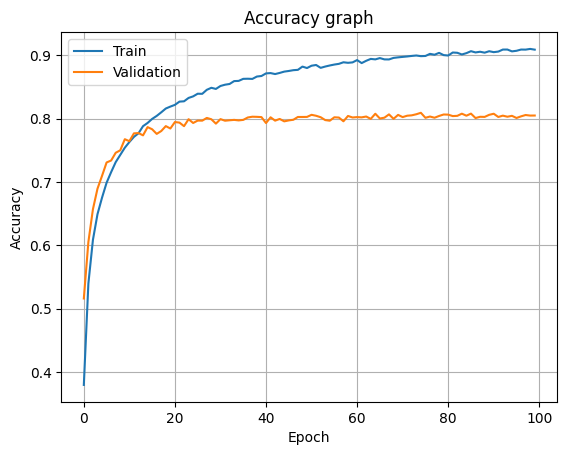

In [10]:
#그래프 그려서 확인
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

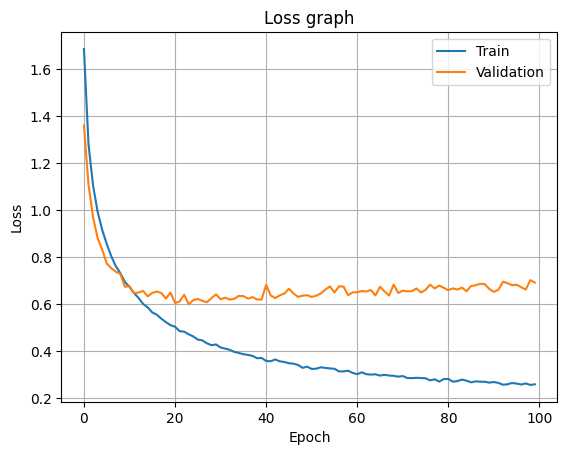

In [11]:
#그래프 그려서 확인
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

# 8.3

In [20]:
#필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [21]:
#MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) #2차원 데이터를 3차원 데이터로 변환
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [22]:
#모델 선택(신경망 구조 설계)
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(Conv2D(32,(3,3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3), activation = 'relu'))
cnn.add(Conv2D(64,(3,3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 10, activation = 'softmax'))

In [23]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs=100, validation_data = (x_test, y_test), verbose = 2)
#만들어진 모델 로컬에 저장하기
cnn.save('cnn_v2.h5')

Epoch 1/100
469/469 - 37s - loss: 0.2276 - accuracy: 0.9253 - val_loss: 0.0433 - val_accuracy: 0.9848 - 37s/epoch - 79ms/step
Epoch 2/100
469/469 - 35s - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0281 - val_accuracy: 0.9905 - 35s/epoch - 74ms/step
Epoch 3/100
469/469 - 35s - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0245 - val_accuracy: 0.9910 - 35s/epoch - 74ms/step
Epoch 4/100
469/469 - 35s - loss: 0.0399 - accuracy: 0.9876 - val_loss: 0.0201 - val_accuracy: 0.9928 - 35s/epoch - 74ms/step
Epoch 5/100
469/469 - 35s - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0209 - val_accuracy: 0.9931 - 35s/epoch - 74ms/step
Epoch 6/100
469/469 - 35s - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0187 - val_accuracy: 0.9944 - 35s/epoch - 74ms/step
Epoch 7/100
469/469 - 35s - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0193 - val_accuracy: 0.9936 - 35s/epoch - 75ms/step
Epoch 8/100
469/469 - 35s - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0175 - val_accuracy: 0.9945 - 35s/epoch - 75

C:\Users\tnv59\AppData\Local\anaconda3\envs\open_env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#정확도 확인
res = cnn.evaluate(x_test, y_test, verbose = 0)
print('정확률 =', res[1]*100)

정확률 = 99.57000017166138


# 8.4

1/1 [==============================] - 0s 240ms/step


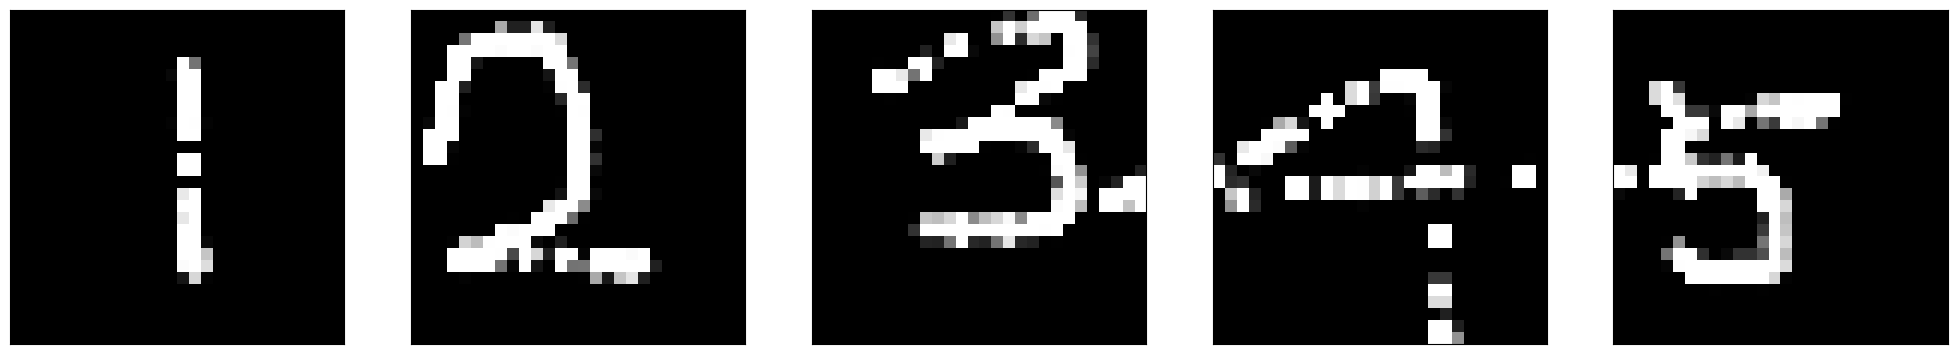

1/1 [==============================] - 0s 32ms/step


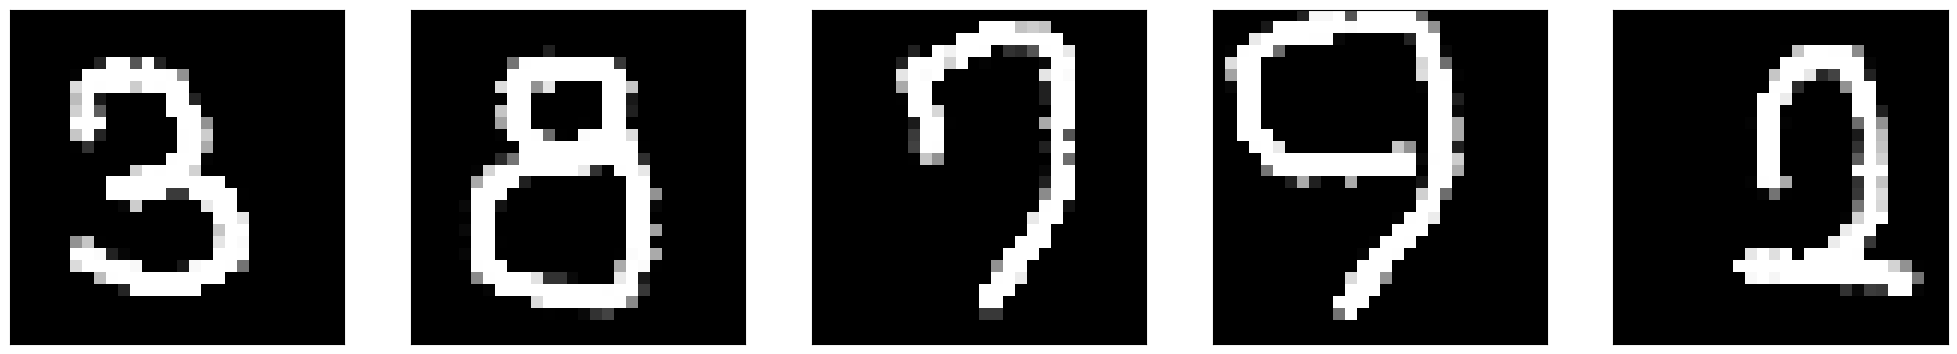

In [25]:
#7장에서 했던 글씨 판별하는 프로그램 다시 만들어보기 + DNN과 비교하기
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model=tf.keras.models.load_model('cnn_v2.h5')

def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,28,28,1)
    numerals=numerals.astype(np.float32)/255.0
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    winsound.Beep(1000,500)    
        
BrushSiz=4
LColor=(0,0,0)

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()

# 8.5

In [32]:
#증강된 영상 확인하기
import tensorflow.keras.datasets as ds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\tnv59\AppData\Local\Temp\ipykernel_12368\2024931685.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


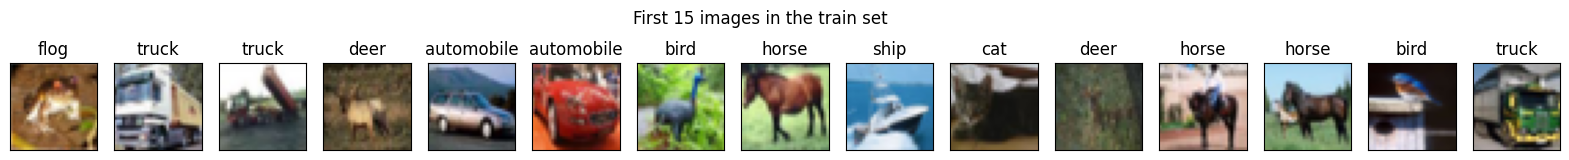

In [33]:
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
x_train=x_train.astype('float32'); x_train/=255
x_train=x_train[0:15,]; y_train=y_train[0:15,]	# 앞 15개에 대해서만 증대 적용
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

plt.figure(figsize=(20,2))
plt.suptitle("First 15 images in the train set")
for i in range(15):
    plt.subplot(1,15,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[int(y_train[i])])
plt.show()      

In [34]:
batch_siz=4			# 한 번에 생성하는 양(미니 배치)
generator=ImageDataGenerator(rotation_range=20.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

C:\Users\tnv59\AppData\Local\Temp\ipykernel_12368\2073961157.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(label[i])])


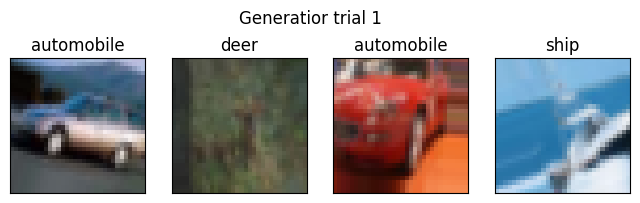

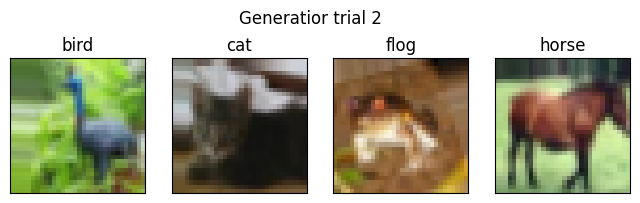

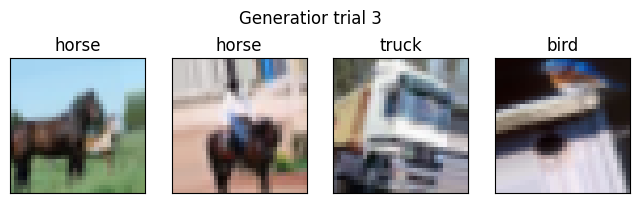

In [35]:
for a in range(3):
    img,label=gen.next()	# 미니 배치만큼 생성
    plt.figure(figsize=(8,2.4))
    plt.suptitle("Generatior trial "+str(a+1))
    for i in range(batch_siz):
        plt.subplot(1,batch_siz,i+1)
        plt.imshow(img[i])
        plt.xticks([]); plt.yticks([])
        plt.title(class_names[int(label[i])])
    plt.show()

## 8.6

In [37]:
#ResNet50으로 자연 영상 인식하기
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [38]:
model = ResNet50(weights = 'imagenet')

img = cv.imread('rabbit.jpg')
x = np.reshape(cv.resize(img, (224,224)), (1,224,224,3))
x = preprocess_input(x)

preds = model.predict(x)

1/1 [==============================] - 1s 1s/step


In [39]:
top5 = decode_predictions(preds, top=5)[0] #1000개의 확률 중에 가장 큰 5개 확률을 취하고 그들의 부류 이름을 같이 제공할 것을 지시
print('예측 결과 : ', top5)

35363/35363 [==============================] - 0s 1us/step
예측 결과 :  [('n02325366', 'wood_rabbit', 0.74275404), ('n02326432', 'hare', 0.24023646), ('n02328150', 'Angora', 0.008815705), ('n01877812', 'wallaby', 0.0026892405), ('n02356798', 'fox_squirrel', 0.0012279289)]


In [40]:
for i in range(5):
    cv.putText(img, top5[i][1]+':'+str(top5[i][2]), (10,20+i*20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255),1)

cv.imshow('Recogition result', img)

cv.waitKey()
cv.destroyAllWindows()

## 8.7

Found 952 files belonging to 5 classes.
Using 762 files for training.
Found 952 files belonging to 5 classes.
Using 190 files for validation.
Epoch 1/30
48/48 - 185s - loss: 8.5378 - accuracy: 0.0171 - val_loss: 4.0196 - val_accuracy: 0.0684 - 185s/epoch - 4s/step
Epoch 2/30
48/48 - 166s - loss: 5.7545 - accuracy: 0.0591 - val_loss: 2.1407 - val_accuracy: 0.3474 - 166s/epoch - 3s/step
Epoch 3/30
48/48 - 170s - loss: 3.9717 - accuracy: 0.1877 - val_loss: 1.4142 - val_accuracy: 0.5053 - 170s/epoch - 4s/step
Epoch 4/30
48/48 - 169s - loss: 3.1692 - accuracy: 0.2756 - val_loss: 1.0892 - val_accuracy: 0.5895 - 169s/epoch - 4s/step
Epoch 5/30
48/48 - 152s - loss: 2.5978 - accuracy: 0.3806 - val_loss: 0.8828 - val_accuracy: 0.6684 - 152s/epoch - 3s/step
Epoch 6/30
48/48 - 154s - loss: 2.3494 - accuracy: 0.4108 - val_loss: 0.7611 - val_accuracy: 0.7105 - 154s/epoch - 3s/step
Epoch 7/30
48/48 - 158s - loss: 2.0391 - accuracy: 0.4672 - val_loss: 0.6541 - val_accuracy: 0.7842 - 158s/epoch - 3s/st

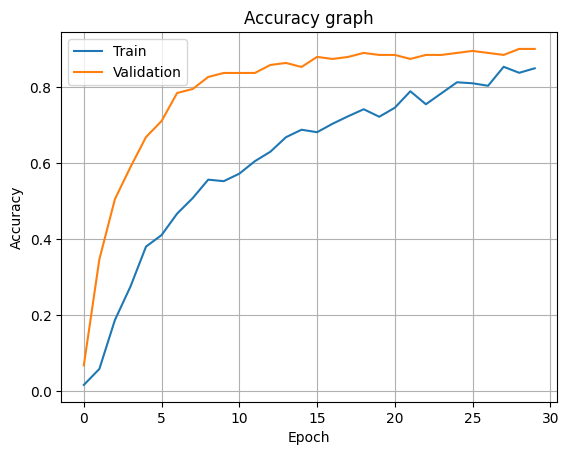

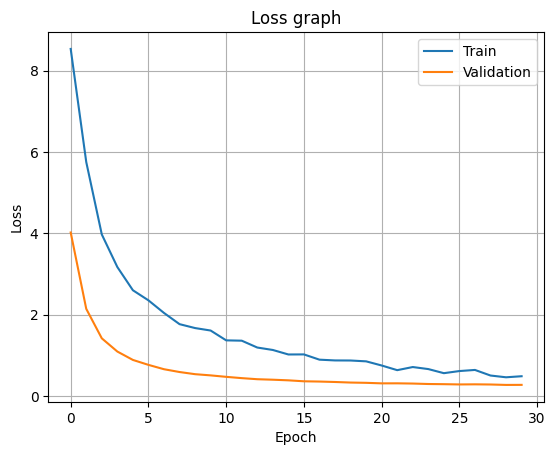

In [49]:
#DenseNet21로 견종 인식하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib
#data_path를 꼭 설정하기! pathlib함수도 불러오기
data_path = pathlib.Path(r'C:/Users/tnv59/open_env/images/images/Images')
#폴더에서 영상을 읽는데 쓰는 image_dataset_from_directory함수 불러오기
train_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='training',seed=123,image_size=(224,224),batch_size=16)
test_ds=image_dataset_from_directory(data_path,validation_split=0.2,subset='validation',seed=123,image_size=(224,224),batch_size=16)

base_model=DenseNet121(weights='imagenet',include_top=False,input_shape=(224,224,3)) #모델의 뒤쪽에 있는 완전연결층은 포함시키지 말아달라는 내용
cnn=Sequential()
cnn.add(Rescaling(1.0/255.0))
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dropout(0.75))
cnn.add(Dense(units=120,activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.000001),metrics=['accuracy'])
hist=cnn.fit(train_ds,epochs=30,validation_data=test_ds,verbose=2)

print('정확률=',cnn.evaluate(test_ds,verbose=0)[1]*100)

cnn.save('cnn_for_stanford_dogs.h5')	# 미세 조정된 모델을 파일에 저장
#나중에 쓸 수 있도록 pickle 라이브러리를 불러와 dump함수 사용
import pickle
f=open('dog_species_names.txt','wb')
pickle.dump(train_ds.class_names,f)
f.close()

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

## 8.8

In [50]:
#견종 인식 프로그램 구현하기
import cv2 as cv 
import numpy as np
import tensorflow as tf
import winsound       
import pickle
import sys
from PyQt5.QtWidgets import *

cnn=tf.keras.models.load_model('cnn_for_stanford_dogs.h5')	# 모델 읽기
dog_species=pickle.load(open('dog_species_names.txt','rb'))	# 견종 이름
         
class DogSpeciesRecognition(QMainWindow):
    def __init__(self) :
        super().__init__()
        self.setWindowTitle('견종 인식')
        self.setGeometry(200,200,700,100)
       
        fileButton=QPushButton('강아지 사진 열기',self) 
        recognitionButton=QPushButton('품종 인식',self)
        quitButton=QPushButton('나가기',self) 
        
        fileButton.setGeometry(10,10,100,30)
        recognitionButton.setGeometry(110,10,100,30)
        quitButton.setGeometry(510,10,100,30)
        
        fileButton.clicked.connect(self.pictureOpenFunction)
        recognitionButton.clicked.connect(self.recognitionFunction)                         
        quitButton.clicked.connect(self.quitFunction)
        
    def pictureOpenFunction(self):
        fname=QFileDialog.getOpenFileName(self,'강아지 사진 읽기','./')           
        self.img=cv.imread(fname[0])
        if self.img is None: sys.exit('파일을 찾을 수 없습니다.')  
        
        cv.imshow('Dog image',self.img)          
        
    def recognitionFunction(self):
        x=np.reshape(cv.resize(self.img,(224,224)),(1,224,224,3))    
        res=cnn.predict(x)[0]		# 예측
        top5=np.argsort(-res)[:5]
        top5_dog_species_names=[dog_species[i] for i in top5]
        for i in range(5):
            prob='('+str(res[top5[i]])+')'
            name=str(top5_dog_species_names[i]).split('-')[1]
            cv.putText(self.img,prob+name,(10,100+i*30),cv.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        cv.imshow('Dog image',self.img)   
        winsound.Beep(1000,500)
                
    def quitFunction(self):
        cv.destroyAllWindows()        
        self.close()
              
app=QApplication(sys.argv) 
win=DogSpeciesRecognition() 
win.show()
app.exec_()

C:\Users\tnv59\AppData\Local\Temp\ipykernel_12368\4137841372.py:12: DeprecationWarning: sipPyTypeDict() is deprecated, the extension module should use sipPyTypeDictRef() instead
  class DogSpeciesRecognition(QMainWindow):


1/1 [==============================] - 2s 2s/step


0